In [ ]:
# STEP 0: Upload CSV File from Your Computer
from google.colab import files
uploaded = files.upload()


Saving car data.csv to car data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the uploaded CSV file
df = pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Remove meaningless column
df.drop(['Car_Name'], axis=1, inplace=True)

# Drop null values
df.dropna(inplace=True)

# Outlier Removal Function
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply outlier removal
df = remove_outliers(df, 'Kms_Driven')
df = remove_outliers(df, 'Selling_Price')


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
# One-hot encode
df = pd.get_dummies(df, drop_first=True)


In [ ]:
print(df.columns)


Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')


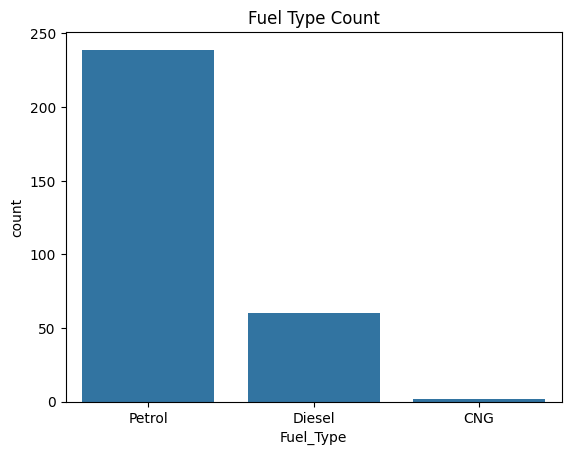

In [ ]:
# Reload fresh dataset for plotting
df_plot = pd.read_csv("car data.csv")

# Plot fuel type count BEFORE encoding
sns.countplot(x='Fuel_Type', data=df_plot)
plt.title("Fuel Type Count")
plt.show()



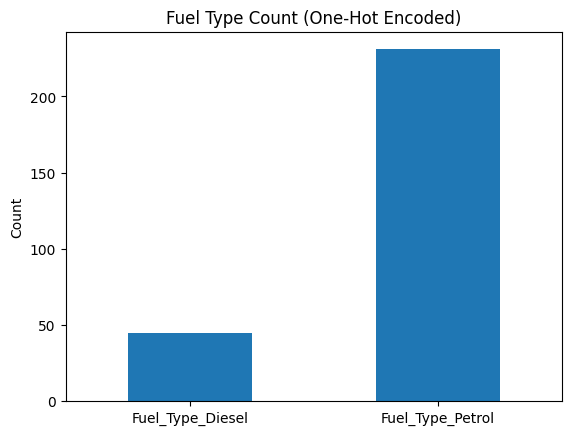

In [ ]:
fuel_cols = [col for col in df.columns if 'Fuel_Type' in col]
df[fuel_cols].sum().plot(kind='bar')
plt.title("Fuel Type Count (One-Hot Encoded)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


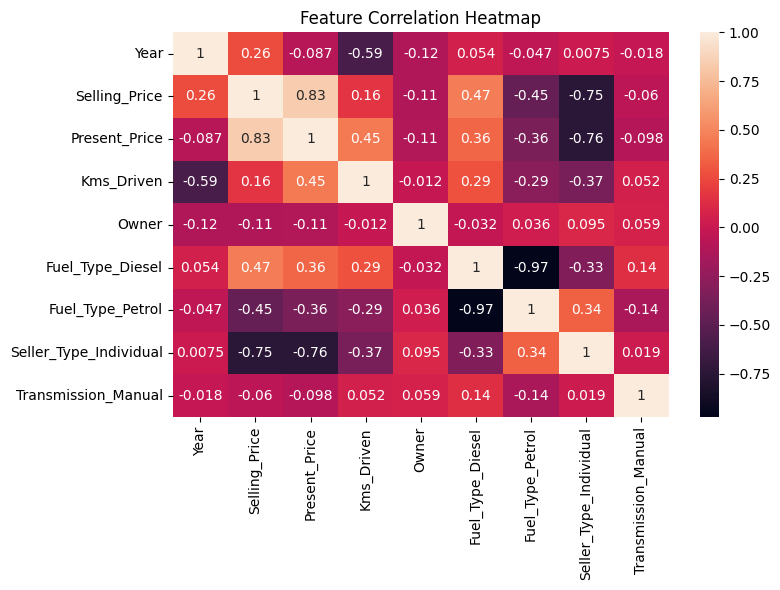

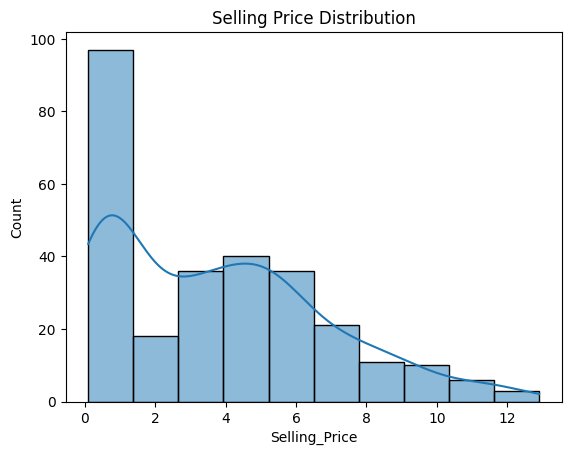

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Remove this line as the column 'Fuel Type Count' does not exist in df
# sns.countplot(x='Fuel Type Count', data=df)
# plt.title("Fuel Type Count")
# plt.show()

# Selling Price Distribution
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()

R² Score: 0.7921136562638588
Mean Squared Error: 2.2431141989023002


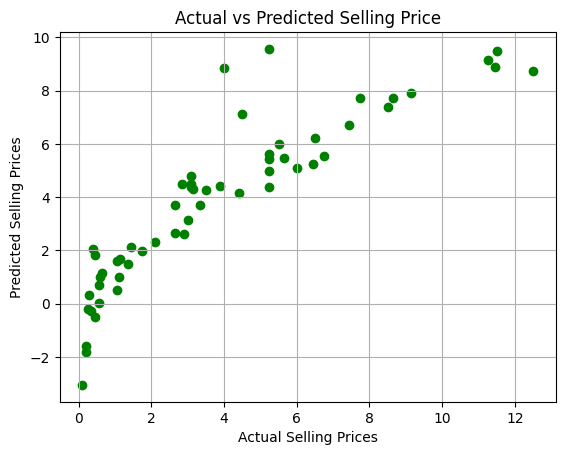

In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Visualization
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()
